### Import libraires

In [25]:
from transformers import pipeline
import pandas as pd
import re

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
data = pd.read_csv("book_reviews_sample.csv")
data.head()

In [ ]:
data['review_clean'] = data['reviewText'].str.lower()
data['review_clean'] = data.apply(lambda x: re.sub(r"([^\w\s])", "", x['review_clean']), axis=1)

In [ ]:
data

In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis")

In [ ]:
print(sentiment_pipeline(data['review_clean'][0]))

In [21]:
sentiment_label_list = []
sentiment_score_list = []
for reviews in data['review_clean'].values:
    sentiment_list = sentiment_pipeline(reviews)
    sentiment_label = [sent['label'] for sent in sentiment_list]
    sentiment_score = [sent['score'] for sent in sentiment_list]
    sentiment_label_list.append(sentiment_label[0])
    sentiment_score_list.append(sentiment_score[0])


In [22]:
data['sentiment_label'] = sentiment_label_list
data['sentiment_score'] = sentiment_score_list

In [23]:
data

,index,reviewText,rating,review_clean,sentiment_label,sentiment_score
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,POSITIVE,0.998570
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,POSITIVE,0.999864
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,NEGATIVE,0.999733
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,NEGATIVE,0.757564
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,NEGATIVE,0.999435
...,...,...,...,...,...,...
95,1794,Love this author. I have read most of her book...,5,love this author i have read most of her books...,POSITIVE,0.999577
96,6716,This book was not bad! I like the storyline ! ...,2,this book was not bad i like the storyline th...,NEGATIVE,0.992740
97,7372,This is part of a series I read and I loved th...,5,this is part of a series i read and i loved th...,POSITIVE,0.999763
98,5676,Finally a Texas newspaper in Kindle format.Way...,4,finally a texas newspaper in kindle formatway ...,NEGATIVE,0.860994


Matplotlib is building the font cache; this may take a moment.


<Axes: xlabel='sentiment_label'>

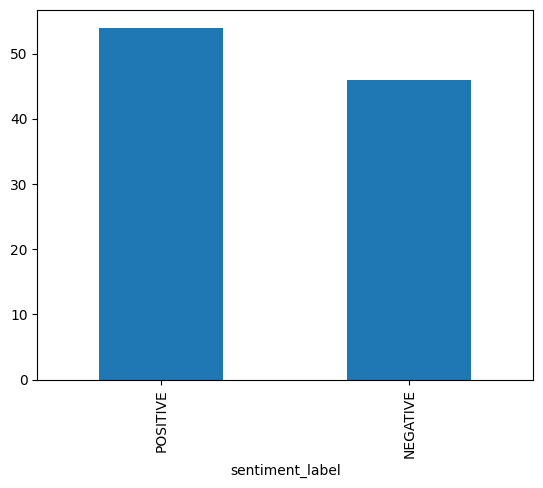

In [26]:
data['sentiment_label'].value_counts().plot.bar()